In [1]:
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import requests
# import time
from scipy.stats import *
from pprint import pprint
import itertools

continents_data = 'continents.csv'
continents = pd.read_csv(continents_data)
continents_clean = pd.DataFrame({'Country': continents['name'], 'Region': continents['region'], 'Sub-Region': continents['sub-region']})


from ipynb.fs.full.emissions_analysis import main_df
main_df

Country  Year  Savanna fires  Forest fires  Crop Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0000                          0.0                 11.807483   
1             678.1600                          0.0                 11.712073   
2             686.0000                          0.0                 11.712073   
3             686.0000                          0.0                 11.712073   
4             705.6000                          0.0                 11.712073   
...                ...                          ...                       ...   
6960            7.4088                          0.0                 75.000000   
6961            7.9458                          0.0                 67.000000   
6962            8.1399                          0.0                 66.000000   
6963            7.8322                          0.0                 73.000000   
6964            7.9733                          0.0                 73.000000   

      Food Transport  Forestland  ...  Fires in organic soils  \
0            63.1152  -2388.8030  ...                     0.0   
1            61.2125  -2388.8030  ...                     0.0   
2            53.3170  -2388.8030  ...                     0.0   
3            54.3617  -2388.8030  ...                     0.0   
4            53.9874  -2388.8030  ...                     0.0   
...              ...         ...  ...                     ...   
6960        251.1465  76500.2982  ...                     0.0   
6961        255.7975  76500.2982  ...                     0.0   
6962        327.0897  76500.2982  ...                     0.0   
6963        290.1893  76500.2982  ...                     0.0   
6964        238.7639  76500.2982  ...                     0.0   

      Fires in humid tropical forests  On-farm energy use  Rural population  \
0                                 0.0                 NaN         9655167.0   
1                                 0.0                 NaN        10230490.0   
2                                 0.0                 NaN        10995568.0   
3                                 0.0                 NaN        11858090.0   
4                                 0.0                 NaN        12690115.0   
...                               ...                 ...               ...   
6960                              0.0            417.3150        10934468.0   
6961                              0.0            398.1644        11201138.0   
6962                              0.0            465.7735        11465748.0   
6963                              0.0            444.2335        11725970.0   
6964                              0.0            444.2335        11980005.0   

      Urban population  Total Population - Male  Total Population - Female  \
0            2593947.0                5348387.0                  5346409.0   
1            2763167.0                5372959.0                  5372208.0   
2            2985663.0                6028494.0                  6028939.0   
3            3237009.0                7003641.0                  7000119.0   
4            3482604.0                7733458.0                 

In [2]:
print(main_df['Country'].count())
print(main_df['Food Retail'].count())


6965
6965


## Setting up a DataBase for use with population changes

In [3]:
# Setting up the database by selecting the columsn I need out of main_df

percentages_df = main_df[['Country','Year','Rural population','Urban population']]

# Combinding the percentages data set with that of the continents CSV to give each country a Region and Sub-Region designation
percentages_df = pd.merge(percentages_df, continents_clean, how='left')


percentages_df = percentages_df.dropna() 


In [4]:
# Testing for any bad values in my df

print(percentages_df['Country'].isnull().values.any())
# print(percentages_df['Food Processing'].isnull().values.any())
print(percentages_df['Region'].isnull().values.any())
# print(percentages_df['Region'].count())
print(percentages_df['Sub-Region'].isnull().values.any())
# print(percentages_df['Sub-Region'].count())
print(percentages_df['Urban population'].isnull().values.any())
print(percentages_df['Year'].isnull().values.any())
# print(percentages_df['total_emission'].isnull().values.any())

False
False
False
False
False


# Function to create a population graph for a sub_region

In [5]:
# Set up funciton to create a population graph for a sub_region

# CHOOSE ONE BELOW

# Sub-Saharan Africa                 1398
# Latin America and the Caribbean    1240
# Western Asia                        459
# Southern Europe                     398
# Northern Europe                     335
# South-eastern Asia                  279
# Southern Asia                       248
# Polynesia                           248
# Western Europe                      228
# Micronesia                          213
# Eastern Europe                      210
# Northern Africa                     195
# Melanesia                           155
# Central Asia                        145
# Northern America                    124
# Eastern Asia                         93
# Australia and New Zealand            62

def population_change(sub_region):

    sub1 = percentages_df.loc[percentages_df['Sub-Region'] == sub_region, ['Year','Urban population']]
    sub2 = sub1.groupby('Year')['Urban population'].mean()

    sub3 = percentages_df.loc[percentages_df['Sub-Region'] == sub_region, ['Year','Rural population']]
    sub4 = sub3.groupby('Year')['Rural population'].mean()

    # Plotting and formatting

    plt.plot(sub2, label='Urban')
    plt.ticklabel_format(style='plain')

    plt.plot(sub4, label='Rural', alpha=.5, linestyle='dashed')

    plt.legend()
    plt.ylabel('Population')
    plt.xlabel('Year')

    plt.title(f'Population Changes in the {sub_region} sub-region')
    plt.show()

# Setting up a database to use with Food Processing vs Total Emissions

In [6]:
# Setting up the DF
food_percentages_df = main_df[['Country','Year','Urban population','Food Processing','total_emission']]

# Getting the percentage calculations for each category
food_percentages_df['Percent of Urban'] = (food_percentages_df['Food Processing'] / food_percentages_df['Urban population']) * 100
food_percentages_df['Percent of Total Emissions'] = (food_percentages_df['Food Processing'] / food_percentages_df['total_emission']) * 100

# Merging with the Continents DF
food_percentages_df = pd.merge(food_percentages_df, continents_clean, how='left')

# Dropping the countries that didn't have a region associated with them
food_percentages_df = food_percentages_df.dropna() 
food_percentages_df

/var/folders/lm/zm6_v2d953zcr8t5mrvy0_qw0000gn/T/ipykernel_50376/3517031105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_percentages_df['Percent of Urban'] = (food_percentages_df['Food Processing'] / food_percentages_df['Urban population']) * 100
/var/folders/lm/zm6_v2d953zcr8t5mrvy0_qw0000gn/T/ipykernel_50376/3517031105.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_percentages_df['Percent of Total Emissions'] = (food_percentages_df['Food Processing'] / food_percentages_df['total_emis

Country  Year  Urban population  Food Processing  total_emission  \
0     Afghanistan  1990         2593947.0        252.21419     2198.963539   
1     Afghanistan  1991         2763167.0        252.21419     2323.876629   
2     Afghanistan  1992         2985663.0        252.21419     2356.304229   
3     Afghanistan  1993         3237009.0        252.21419     2368.470529   
4     Afghanistan  1994         3482604.0        252.21419     2500.768729   
...           ...   ...               ...              ...             ...   
6960     Zimbabwe  2016         5215894.0        317.07440    98491.026347   
6961     Zimbabwe  2017         5328766.0        332.77590    97159.311553   
6962     Zimbabwe  2018         5447513.0        348.51070    97668.308205   
6963     Zimbabwe  2019         5571525.0        327.82090    98988.062799   
6964     Zimbabwe  2020         5700460.0        307.41450    96505.221853   

      Percent of Urban  Percent of Total Emissions  Region          Sub-Region  
0             0.009723                   11.469685    Asia       Southern Asia  
1             0.009128                   10.853166    Asia       Southern Asia  
2             0.008448                   10.703804    Asia       Southern Asia  
3             0.007792                   10.648821    Asia       Southern Asia  
4             0.007242                   10.085466    Asia       Southern Asia  
...                ...                         ...     ...                 ...  
6960          0.006079                    0.321932  Africa  Sub-Saharan Africa  
6961          0.006245                    0.342505  Africa  Sub-Saharan Africa  
6962          0.006398                    0.356831  Africa  Sub-Saharan Africa  
6963          0.005884                    0.331172  Africa  Sub-Saharan Africa  
6964          0.005393                    0.318547  Africa  Sub-Saharan Africa  

[6030 rows x 9 columns]

In [7]:
# Testing for any bad values in my df
# print(food_percentages_df['Country'].isnull().values.any())
# print(food_percentages_df['Food Processing'].isnull().values.any())
# print(food_percentages_df['Region'].isnull().values.any())
# # print(percentages_df['Region'].count())
# print(food_percentages_df['Sub-Region'].isnull().values.any())
# # print(percentages_df['Sub-Region'].count())
# print(food_percentages_df['Urban population'].isnull().values.any())
# print(food_percentages_df['Year'].isnull().values.any())
# print(food_percentages_df['total_emission'].isnull().values.any())

# Function: SUB-Region (Food Processing percentage)

In [8]:
# Function for creating a graph based on the percentages of Food Processing in the Total Emissions data for an entire sub-region

def s_region_perc_processing_graph(sub_region,y_lim):

    temp1 = food_percentages_df.loc[food_percentages_df['Sub-Region'] == sub_region, ['Year', 'Percent of Total Emissions']]
    temp2 = temp1.groupby('Year')['Percent of Total Emissions'].mean()


    # Plotting and formatting
    fig1, ax1 = plt.subplots()
    ax1.plot(temp2, label='Perc. of Total Emissions', alpha=.5)
    ax1.ticklabel_format(style='plain')
    ax1.legend()
    ax1.set_ylabel('Percentage')
    ax1.set_xlabel('Year')
    ax1.set_ylim([0,y_lim])
    plt.title(f'Percentage of Food Processing in Total Emissions for the {sub_region} sub-region')
    plt.show()

# Function: REGION (Food Processing percentage)

In [9]:
# Function for creating a single-graph based on the percentages of Food Processing in the Total Emissions data for all sub-regions in a region given.

    # Parameter one: Africa, Americas, Asia, Europe, Oceania
    # Parameter two: Y_limit
def region_per_graph(region, y_lim):

    sub_regions = food_percentages_df.loc[food_percentages_df['Region'] == region, ['Sub-Region']]
    sub_regions_list = []
    for sub in sub_regions['Sub-Region']:
        if sub not in sub_regions_list:
            sub_regions_list.append(sub)

    for sub_region in sub_regions_list:

        temp1 = food_percentages_df.loc[food_percentages_df['Sub-Region'] == sub_region, ['Year', 'Percent of Total Emissions']]
        temp2 = temp1.groupby('Year')['Percent of Total Emissions'].mean()

        # Plotting and formatting
        plt.plot(temp2, label=sub_region, alpha=.5)

    plt.ticklabel_format(style='plain')
    plt.legend()
    plt.ylabel('Percentage')
    plt.xlabel('Year')
    plt.ylim([0,y_lim])
    plt.title(f'Percentage of Food Processing in Total Emissions for the {region} region')
    plt.show()

# Setting up a database to use with Percentage of Food Retail vs Total Emissions

In [10]:
# Setting up the DF
retail_percentages_df = main_df[['Country','Year','Urban population','Food Retail','total_emission']]

# Getting the percentage calculations for each category
retail_percentages_df['Percent of Urban'] = (retail_percentages_df['Food Retail'] / retail_percentages_df['Urban population']) * 100
retail_percentages_df['Percent of Total Emissions'] = (retail_percentages_df['Food Retail'] / retail_percentages_df['total_emission']) * 100

# Merging with the Continents DF
retail_percentages_df = pd.merge(retail_percentages_df, continents_clean, how='left')

# Dropping the countries that didn't have a region associated with them
retail_percentages_df = retail_percentages_df.dropna() 
retail_percentages_df

/var/folders/lm/zm6_v2d953zcr8t5mrvy0_qw0000gn/T/ipykernel_50376/1906341376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_percentages_df['Percent of Urban'] = (retail_percentages_df['Food Retail'] / retail_percentages_df['Urban population']) * 100
/var/folders/lm/zm6_v2d953zcr8t5mrvy0_qw0000gn/T/ipykernel_50376/1906341376.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_percentages_df['Percent of Total Emissions'] = (retail_percentages_df['Food Retail'] / retail_percentages_df['total_

Country  Year  Urban population  Food Retail  total_emission  \
0     Afghanistan  1990         2593947.0     109.6446     2198.963539   
1     Afghanistan  1991         2763167.0     116.6789     2323.876629   
2     Afghanistan  1992         2985663.0     126.1721     2356.304229   
3     Afghanistan  1993         3237009.0      81.4607     2368.470529   
4     Afghanistan  1994         3482604.0      90.4008     2500.768729   
...           ...   ...               ...          ...             ...   
6960     Zimbabwe  2016         5215894.0     443.0872    98491.026347   
6961     Zimbabwe  2017         5328766.0     445.3881    97159.311553   
6962     Zimbabwe  2018         5447513.0     492.8599    97668.308205   
6963     Zimbabwe  2019         5571525.0     542.5922    98988.062799   
6964     Zimbabwe  2020         5700460.0     568.0445    96505.221853   

      Percent of Urban  Percent of Total Emissions  Region          Sub-Region  
0             0.004227                    4.986195    Asia       Southern Asia  
1             0.004223                    5.020873    Asia       Southern Asia  
2             0.004226                    5.354661    Asia       Southern Asia  
3             0.002517                    3.439380    Asia       Southern Asia  
4             0.002596                    3.614920    Asia       Southern Asia  
...                ...                         ...     ...                 ...  
6960          0.008495                    0.449876  Africa  Sub-Saharan Africa  
6961          0.008358                    0.458410  Africa  Sub-Saharan Africa  
6962          0.009047                    0.504626  Africa  Sub-Saharan Africa  
6963          0.009739                    0.548139  Africa  Sub-Saharan Africa  
6964          0.009965                    0.588615  Africa  Sub-Saharan Africa  

[6030 rows x 9 columns]

In [11]:
# Testing for any bad values in my df
# print(retail_percentages_df['Country'].isnull().values.any())
# print(retail_percentages_df['Country'].count())
# print(retail_percentages_df['Urban population'].isnull().values.any())
# print(retail_percentages_df['Region'].isnull().values.any())
# print(retail_percentages_df['Region'].count())
# print(retail_percentages_df['Sub-Region'].isnull().values.any())
# print(retail_percentages_df['Sub-Region'].count())
# print(retail_percentages_df['Food Retail'].isnull().values.any())
# print(retail_percentages_df['Year'].isnull().values.any())
# print(retail_percentages_df['total_emission'].isnull().values.any())

# Function: Sub-Region (Food Retail vs Total Emissions)

In [12]:
# Function for creating a graph based on the percentages of Food Processing in the Total Emissions data for an entire sub-region

def s_region_perc_retail_graph(sub_region,y_lim):

    temp1 = retail_percentages_df.loc[food_percentages_df['Sub-Region'] == sub_region, ['Year', 'Percent of Total Emissions']]
    temp2 = temp1.groupby('Year')['Percent of Total Emissions'].mean()


    # Plotting and formatting
    fig1, ax1 = plt.subplots()
    ax1.plot(temp2, label='Perc. of Total Emissions', alpha=.5)
    ax1.ticklabel_format(style='plain')
    ax1.legend()
    ax1.set_ylabel('Percentage')
    ax1.set_xlabel('Year')
    ax1.set_ylim([0,y_lim])
    plt.title(f'Percentage of Food Retail in Total Emissions for the {sub_region} sub-region')
    plt.show()

# Function: REGION (Food Retail percentage)

In [13]:
# Function for creating a single-graph based on the percentages of Food Processing in the Total Emissions data for all sub-regions in a region given.

    # Parameter one: Africa, Americas, Asia, Europe, Oceania
    # Parameter two: Y_limit
def region_perc_retail_graph(region, y_lim):

    sub_regions = retail_percentages_df.loc[retail_percentages_df['Region'] == region, ['Sub-Region']]
    sub_regions_list = []
    for sub in sub_regions['Sub-Region']:
        if sub not in sub_regions_list:
            sub_regions_list.append(sub)

    for sub_region in sub_regions_list:

        temp1 = retail_percentages_df.loc[retail_percentages_df['Sub-Region'] == sub_region, ['Year', 'Percent of Total Emissions']]
        temp2 = temp1.groupby('Year')['Percent of Total Emissions'].mean()

        # Plotting and formatting
        plt.plot(temp2, label=sub_region, alpha=.5)

    plt.ticklabel_format(style='plain')
    plt.legend()
    plt.ylabel('Percentage')
    plt.xlabel('Year')
    plt.ylim([0,y_lim])
    plt.title(f'Percentage of Food Retail in Total Emissions for the {region} region')
    plt.show()

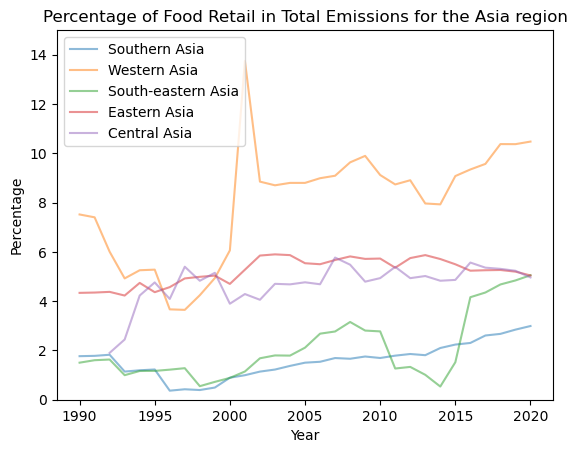

In [14]:
region_perc_retail_graph('Asia', 15)

# Function: Population + Food Retail percentages

In [15]:
def pop_ret_analysis(sub_region):

    temp_urban1 = percentages_df.loc[percentages_df['Sub-Region'] == sub_region, ['Year','Urban population']]
    temp_urban = temp_urban1.groupby('Year')['Urban population'].mean()

    temp_rural1 = percentages_df.loc[percentages_df['Sub-Region'] == sub_region, ['Year','Rural population']]
    temp_rural = temp_rural1.groupby('Year')['Rural population'].mean()

    temp_perc1 = retail_percentages_df.loc[food_percentages_df['Sub-Region'] == sub_region, ['Year', 'Percent of Total Emissions']]
    retail_perc = temp_perc1.groupby('Year')['Percent of Total Emissions'].mean()

    y_lim = (retail_perc.max()) + (retail_perc.max() + (retail_perc.max() * 0.25))

    fig1, ax2 = plt.subplots()
    ax3 = ax2.twinx()

    ax3.plot(temp_urban, label='Urban')
    # ax3.plot(west_asia_yields, label='Western Asia')
    ax3.plot(temp_rural, label='Rural', alpha=.3)
    # ax3.plot(east_asia_yields, label='Eastern Asia')
    # ax2.plot(cent_asia_yields, label='Central Asia')
    # ax4.plot(south_asia_ch4_yields, alpha=.65, linestyle='dashed')
    ax2.plot(retail_perc, alpha=.65, linestyle='dashed', label='Food Retail')
    # ax3.plot(se_asia_ch4_yields, alpha=.65, linestyle='dashed')
    # ax3.plot(east_asia_ch4_yields, alpha=.65, linestyle='dashed')
    # ax4.plot(cent_asia_ch4_yields, alpha=.65, linestyle='dashed')

    ax3.legend(loc='best')
    ax2.legend(loc='best')

    ax3.set_ylabel('Population')
    ax2.set_ylabel('Percentage of Food Retail Emissions')
    ax3.ticklabel_format(style='plain')
    ax2.set_ylim([0,y_lim])

    plt.title(f"Population Changes vs. Perc. of Food Retail CO2 Emissions in the {sub_region} sub-region")
    plt.show()


    z_score_stat, p_value = normaltest(temp_urban)

    if p_value > 0.05:
        print(f"The Normal Test P-Value for the Urban population is {p_value}.")
        print(f"This indicates that the data likely IS NOT from a normal distribution.")
        print("---------------------------------------------------------------------------------")
        print("")
    else:
        print(f"The Normal Test P-Value for the Urban Population is {p_value}")
        print(f"This indicates that the data likely IS from a normal distribution")
        print("---------------------------------------------------------------------------------")
        print("")
        

    z_score_stat, p_value = normaltest(temp_rural)
    if p_value > 0.05:
        print(f"The Normal Test P-Value for the Rural population is {p_value}.")
        print(f"This indicates that the data likely IS NOT from a normal distribution.")
        print("---------------------------------------------------------------------------------")
        print("")
    else:
        print(f"The Normal Test P-Value for the Rural Population is {p_value}")
        print(f"This indicates that the data likely IS from a normal distribution")
        print("---------------------------------------------------------------------------------")
        print("")

    z_score_stat, p_value = normaltest(retail_perc)
    if p_value > 0.05:
        print(f"The Normal Test P-Value for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is {p_value}.")
        print(f"This indicates that the data likely IS NOT from a normal distribution.")
        print("---------------------------------------------------------------------------------")
        print("")
    else:
        print(f"The Normal Test P-Value for the for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is {p_value}")
        print(f"This indicates that the data likely IS from a normal distribution")
        print("---------------------------------------------------------------------------------")
        print("")



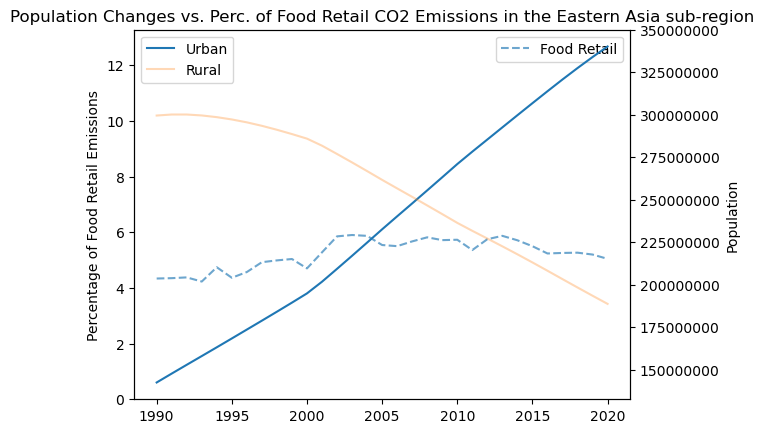

The Normal Test P-Value for the Urban Population is 0.015941536475932577
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural Population is 0.012047395814146947
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 0.09018492193990768.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------



In [16]:
pop_ret_analysis('Eastern Asia')

# Function: Linear Regression of a sub region's chosen population and its Food Retail Percentages

In [56]:

def lin_reg_s_region_analysis1(sub_region,x_value_regress,y_value_regress):

    temp_rural1 = percentages_df.loc[percentages_df['Sub-Region'] == sub_region, ['Year', x_value_regress]]
    temp_rural = temp_rural1.groupby('Year')[x_value_regress].mean()

    temp_perc1 = retail_percentages_df.loc[food_percentages_df['Sub-Region'] == sub_region, ['Year', y_value_regress]]
    retail_perc = temp_perc1.groupby('Year')[y_value_regress].mean()

    x_values = temp_rural
    y_values = retail_perc
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,color='k',alpha=0.6)

    plt.suptitle(
        f"{line_eq}, R-Value: {rvalue}",
        fontsize=11,
        fontweight="bold",
        x=0.135,
        y=0.8,
        ha="left",)  
    print(line_eq)
    print(f"The r-value is {rvalue}")

    plt.scatter(temp_rural,retail_perc)
    plt.ticklabel_format(style='plain')
    plt.title(f"Linear Regression of the {sub_region} sub-region.")
    plt.xlabel(x_value_regress)
    plt.ylabel(f'Food Retail in ({y_value_regress})')
    plt.savefig(sub_region+'_LinRegress.png')
    plt.show()

In [57]:

def lin_reg_s_region_analysis2(sub_region,x_value_regress,y_value_regress):

    temp_rural1 = percentages_df.loc[percentages_df['Sub-Region'] == sub_region, ['Year', x_value_regress]]
    temp_rural = temp_rural1.groupby('Year')[x_value_regress].mean()

    temp_perc1 = percentages_df.loc[percentages_df['Sub-Region'] == sub_region, ['Year', y_value_regress]]
    retail_perc = temp_perc1.groupby('Year')[y_value_regress].mean()

    x_values = temp_rural
    y_values = retail_perc
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,color='k',alpha=0.6)

    plt.suptitle(
        f"{line_eq}, R-Value: {rvalue}",
        fontsize=11,
        fontweight="bold",
        x=0.135,
        y=0.8,
        ha="left",) 

    print(line_eq)
    print(f"The r-value is {rvalue}")

    plt.scatter(temp_rural,retail_perc)
    plt.ticklabel_format(style='plain')
    plt.title(f"Linear Regression of the {sub_region} sub-region.")
    plt.xlabel(x_value_regress)
    plt.ylabel(f'Food Retail in ({y_value_regress})')
    plt.xticks(rotation=90)
    plt.savefig(sub_region+'_LinRegress.png')
    plt.show()

In [26]:
all_sub_regions = []


# for region in list_of_regions:
list_of_regions = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

for region in list_of_regions:
    all_regions = food_percentages_df.loc[food_percentages_df['Region'] == region, ['Sub-Region']]

    for sub in all_regions['Sub-Region']:
        if sub not in all_sub_regions:
            all_sub_regions.append(sub)

all_sub_regions



['Northern Africa',
 'Sub-Saharan Africa',
 'Latin America and the Caribbean',
 'Northern America',
 'Southern Asia',
 'Western Asia',
 'South-eastern Asia',
 'Eastern Asia',
 'Central Asia',
 'Southern Europe',
 'Western Europe',
 'Eastern Europe',
 'Northern Europe',
 'Polynesia',
 'Australia and New Zealand',
 'Melanesia',
 'Micronesia']

# Using the functions to find interesting relationships, then utilizing a the regression function them

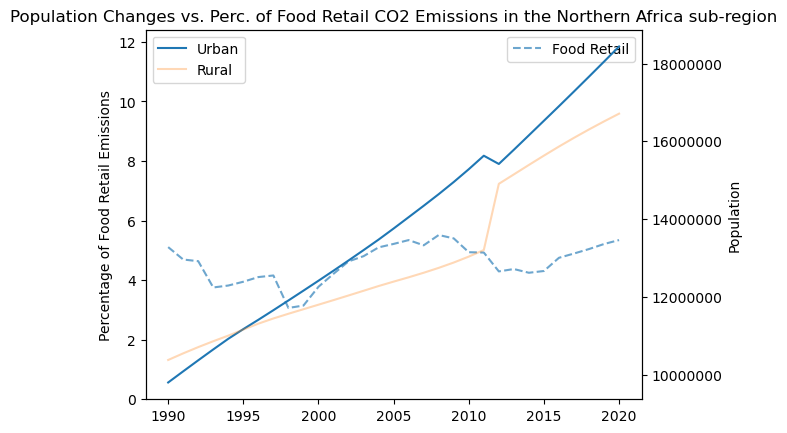

The Normal Test P-Value for the Urban population is 0.13455022867407307.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural population is 0.06993651275631435.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 0.2955442313754718.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

None


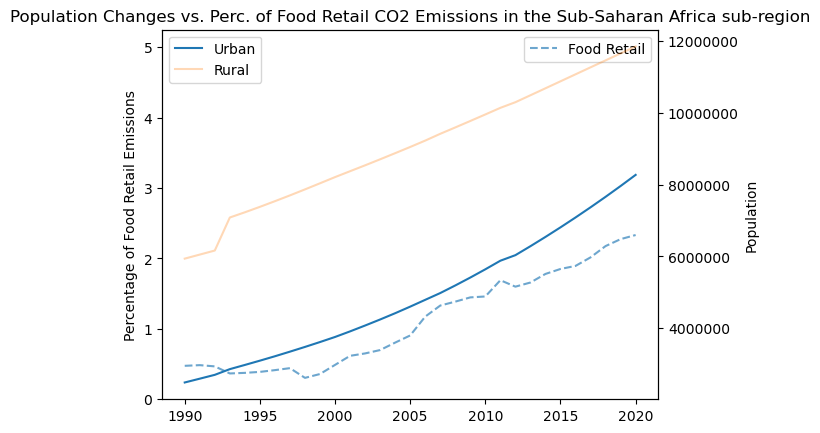

The Normal Test P-Value for the Urban population is 0.1349878147879024.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural population is 0.3178625037203215.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 0.00468574521220784
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

None


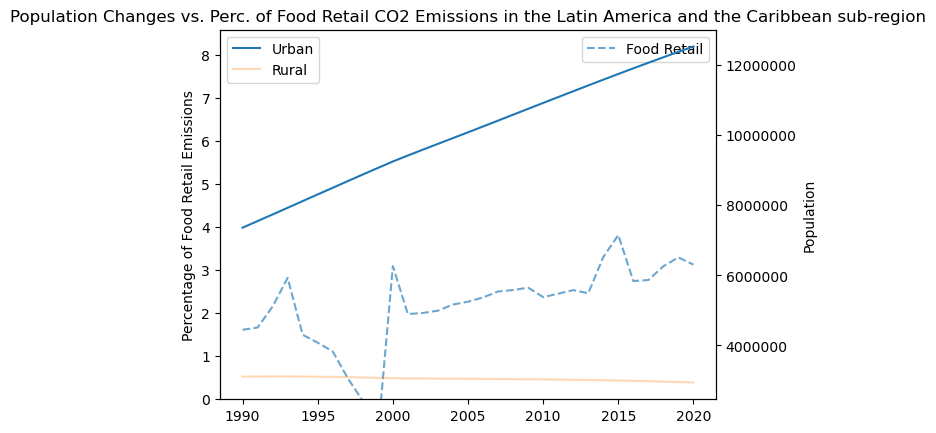

The Normal Test P-Value for the Urban population is 0.07348575208291867.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural population is 0.4646610165513557.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 0.002577860306599034
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

None


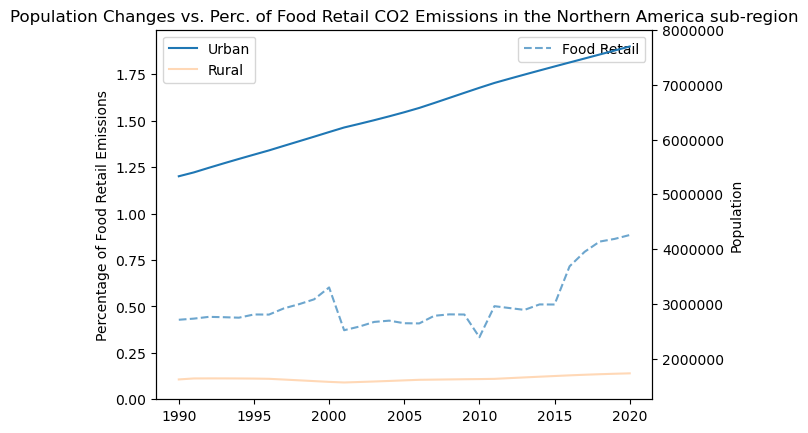

The Normal Test P-Value for the Urban Population is 0.043353721697001156
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural population is 0.30831820365139156.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 0.0014105906935778637
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

None


The Normal Test P-Value for the Urban population is 0.0658095381945757.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural population is 0.07313562019669397.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 0.9734766330577472.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

None


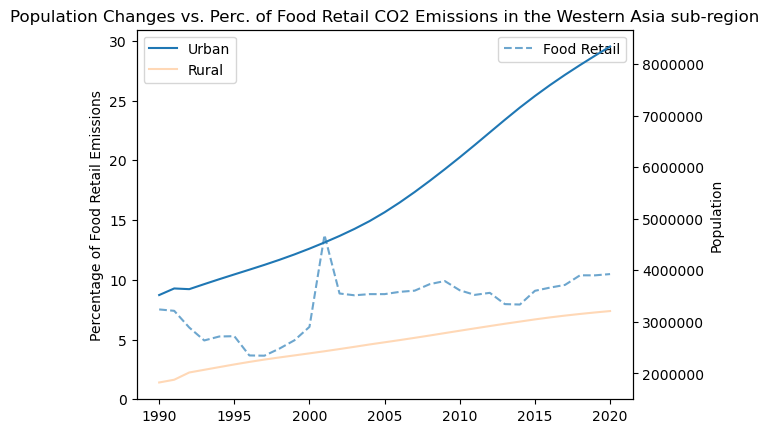

The Normal Test P-Value for the Urban Population is 0.03516301244722277
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural population is 0.16626278200796057.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 0.8685406316469144.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

None


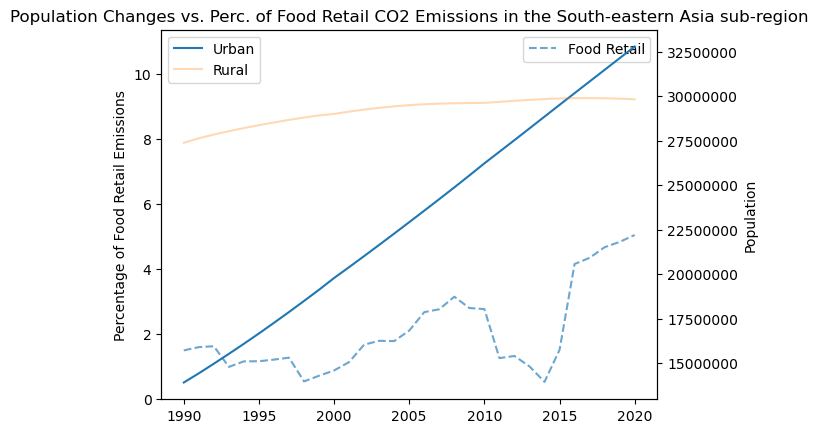

The Normal Test P-Value for the Urban Population is 0.0443322631063658
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural population is 0.06871700689619477.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 0.048217542861734596
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

None


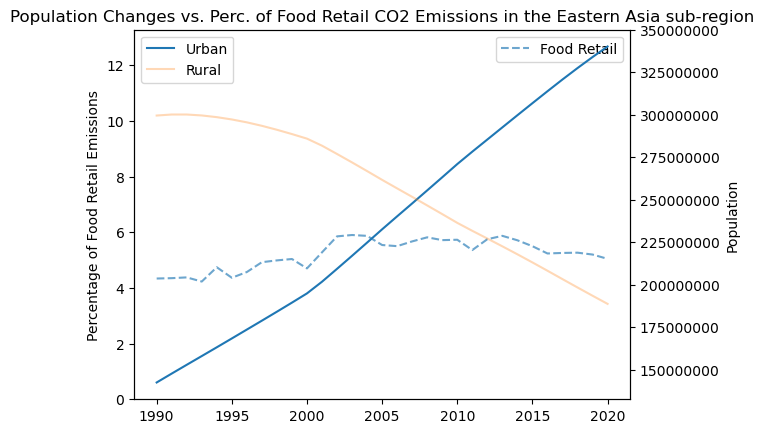

The Normal Test P-Value for the Urban Population is 0.015941536475932577
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural Population is 0.012047395814146947
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 0.09018492193990768.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

None


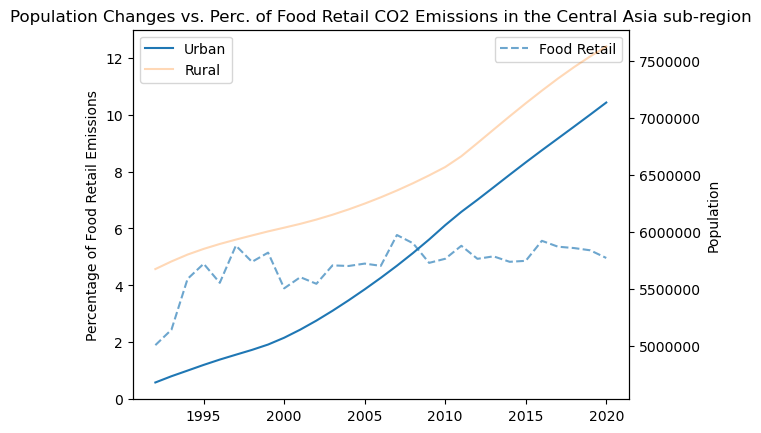

The Normal Test P-Value for the Urban Population is 0.02809623316705829
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural population is 0.161778930928146.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 1.1812312600218947e-05
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

None


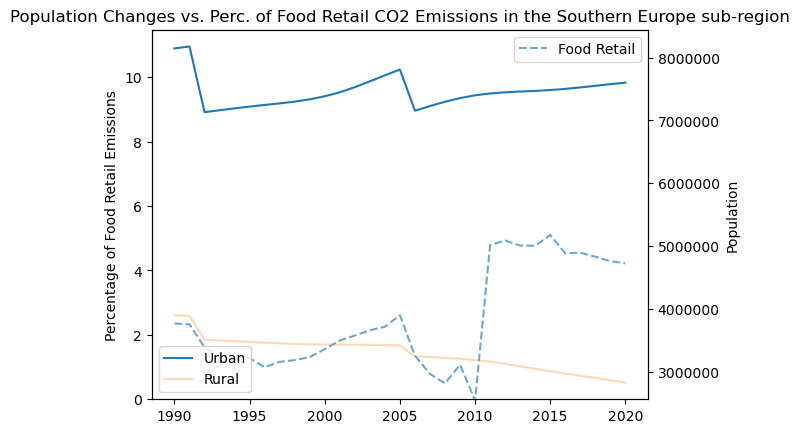

The Normal Test P-Value for the Urban Population is 0.0013627807664936924
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural population is 0.8495770436408542.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 0.006646851926896988
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

None


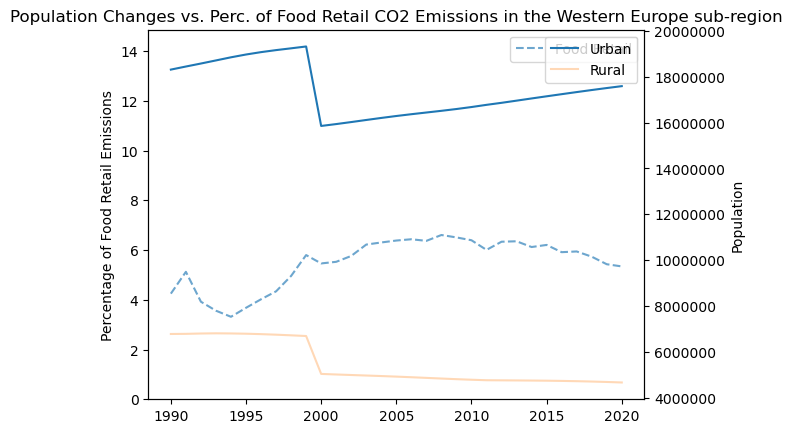

The Normal Test P-Value for the Urban Population is 0.01973936891001985
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural Population is 0.00031367704733608443
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 0.08929108669134386.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

None


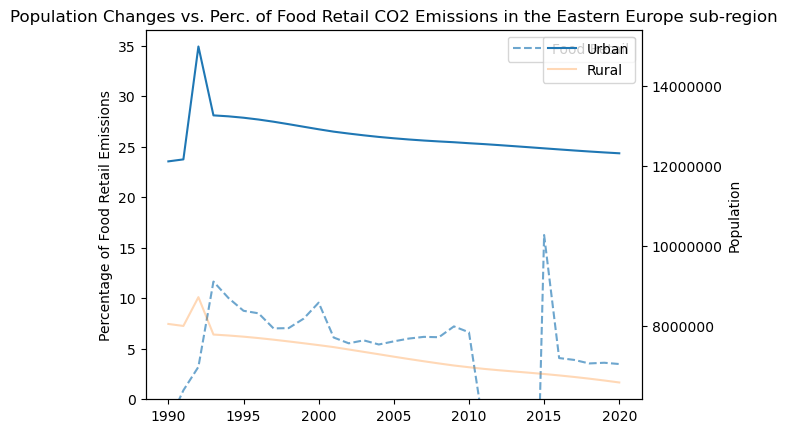

The Normal Test P-Value for the Urban Population is 3.7200893934866747e-09
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural population is 0.1339637920270707.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 1.6044911381455616e-12
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

None


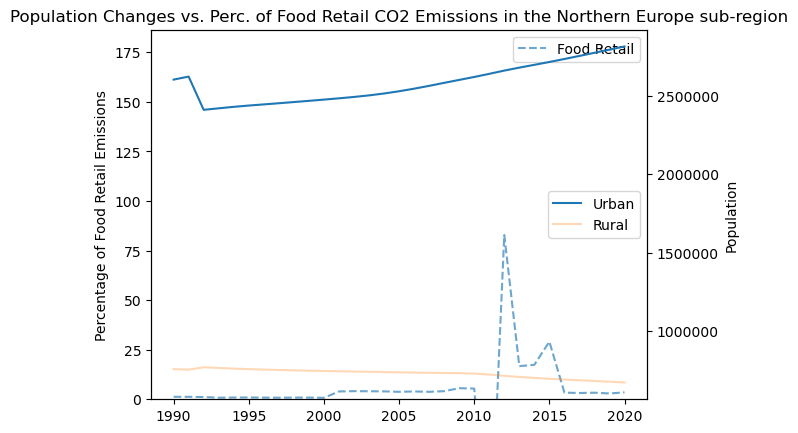

The Normal Test P-Value for the Urban population is 0.10284353851665261.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural population is 0.17181264580107541.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 6.152607303948127e-06
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

None


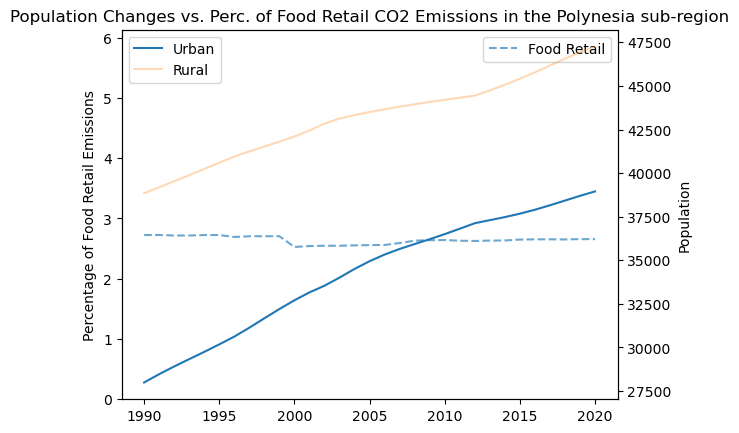

The Normal Test P-Value for the Urban Population is 0.04312935861773956
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural population is 0.4393466364362466.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 0.15500863078665741.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

None


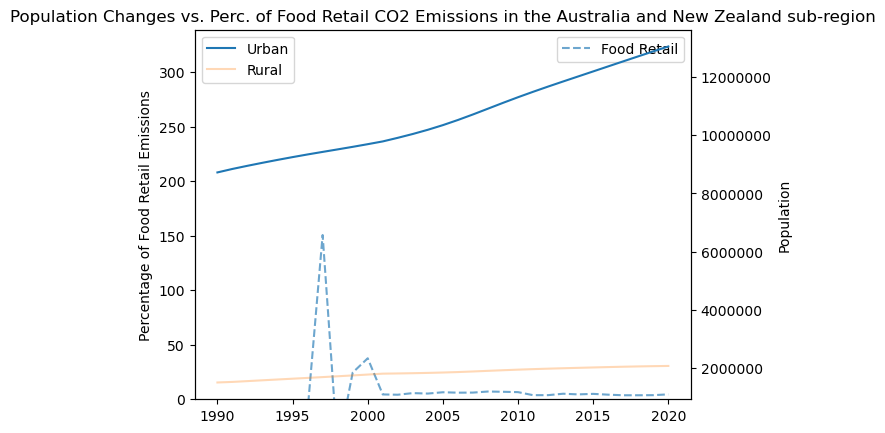

The Normal Test P-Value for the Urban Population is 0.03019795451425004
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural population is 0.14017886318016193.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 5.876416252788829e-13
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

None


The Normal Test P-Value for the Urban population is 0.0926143357835332.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural Population is 0.042260760486944535
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 0.5117943957553532.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

None


The Normal Test P-Value for the Urban population is 0.28184087881720477.
This indicates that the data likely IS NOT from a normal distribution.
---------------------------------------------------------------------------------

The Normal Test P-Value for the Rural Population is 3.09101654267326e-12
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

The Normal Test P-Value for the for the Percentage of Food Retail CO2 Emissions vs. the Total Emissions is 2.102421606681704e-08
This indicates that the data likely IS from a normal distribution
---------------------------------------------------------------------------------

None


In [27]:
for region in all_sub_regions:
    print(pop_ret_analysis(region))

# print(lin_reg_s_region_analysis('Northern America','Rural population',"Percent of Total Emissions"))

# Analysis

Above we have a graph for each sub-region that plots out their urban population, rural population, and the percentage of CO2 "Emissions from the operation of retail establishments selling food."

The hypothesis I was testing was that as an urban population increases, so should the percentage of the carbon emissions produced.

I created graphs for each of the sub-regions in my data set and graphed them out and running normal tests on ach of the data series, that of Urban Populations, that of Rural Populations, and that of the Percent of Food Retail CO2 Emissions vs the Total Emissions.

What I found was that the relationship I had envisioned was not what the data suggested. 

Mostly. 

While the graphs may indicate that there could possibly be a linear relationship, many of the data series I was using failed the Normal Tests and could not, therefore, be used in the Linear regression tests.

But, while analyzing the data I was able to find a few specific sub-regions where the data could be tested further for this relationship and did that.

The Central Asia sub-region's Urban population vs the Food Retail Percentage is has a pretty positive relationship of RVALUE = 0.5705..., meaning that as the urban population increases, the Food Retail Percentage does as well at a steady increase.

The Eastern Europe sub-region's Urban population vs the Food Retail Percentage is has a pretty positive relationship of RVALUE = 0.2158..., meaning that as the urban population increases, the Food Retail Percentage does as well but less intensly than it does in Central Asia.

Though my initial findings and my linear regressions seem to contradict each other it is important to remember that while there is a linear relationship between a few of the rural or urban populations and the corresponding Food Retail Emissions Percentages, corellation does not equal causation. There are hundreds of countries in the data set being analyzed here and CO2 Emissions Science is a very, VERY complex field. some countries will have different relationships to Food Retail Emissions than other.



In [62]:
rural = 'Rural population'
urban = 'Urban population'
x_temp = 'Percent of Total Emissions'

# 'Northern Africa',
#  'Sub-Saharan Africa',
#  'Latin America and the Caribbean',
#  'Northern America',
#  'Southern Asia',
#  'Western Asia',
#  'South-eastern Asia',
#  'Eastern Asia',
#  'Central Asia',
#  'Southern Europe',
#  'Western Europe',
#  'Eastern Europe',
#  'Northern Europe',
#  'Polynesia',
#  'Australia and New Zealand',
#  'Melanesia',
#  'Micronesia'

lin_reg_s_region_analysis1('Eastern Europe', urban, x_temp)
# lin_reg_s_region_analysis2('Central Asia',rural,urban)

y = 0.0x + -48.06
The r-value is 0.2158491536390058
